In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
from Associations import Association
from Preliminary import DrugPreliminary

## Import data-sets

In [2]:
datasets = Association()

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


[2019-02-19 17:26:07,115 - INFO]: #(Samples)=500
[2019-02-19 17:26:09,217 - INFO]: #(Drugs)=579; #(Genes)=16818; #(Genomic)=536; 


# Drug-response analysis notebook

### Drug-response measurements across cell lines

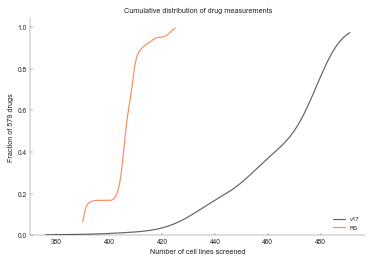

In [8]:
DrugPreliminary.histogram_drug(datasets.drespo.count(1))

### Drug-responses below 50% of the maximum screened concentration

In [6]:
num_resp = pd.Series(
    {
        drug: (
            datasets.drespo.loc[drug].dropna()
            < np.log(datasets.drespo_obj.maxconcentration[drug] * 0.5)
        ).sum()
        for drug in datasets.drespo.index
    }
).reset_index()
num_resp.columns = ["DRUG_ID", "DRUG_NAME", "VERSION", "n_resp"]

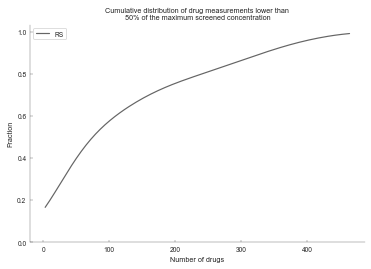

In [7]:
DrugPreliminary.histogram_drug_response(num_resp)